In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Cheeting:

* there are negative values in the diff(data), I replace it with zero.
* Nan values are replaced with previous value

In [4]:

home = "../../"
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv").fillna(method='ffill')

In [26]:
home = "../../"
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv").fillna(method='ffill')
#county_data=county_data.rename(lambda l: l if l!="Budapest" else "főváros")[county_data.columns[1:]].dropna()
county_data=county_data.rename(lambda l: l if l!="Budapest" else "főváros")[county_data.columns[1:]].diff(axis=0).dropna()
county_data[county_data<0]=0
county_data = county_data.rolling(7).mean().dropna()

sim_data = pd.read_csv(f"{home}/code/control_panel/log/county.csv")
c_charts = [(label,np.array(sim_data[label])) for label in sim_data.columns[1:]]

In [27]:
county_data

,Bács-Kiskun,Baranya,Békés,Borsod-Abaúj-Zemplén,Budapest,Csongrád,Fejér,Győr-Moson-Sopron,Hajdú-Bihar,Heves,...,Komárom-Esztergom,Nógrád,Pest,Somogy,Szabolcs-Szatmár-Bereg,Tolna,Vas,Veszprém,Zala,Összesen
7,1.571429,0.571429,0.857143,0.285714,18.571429,2.142857,3.857143,1.571429,1.000000,0.285714,...,0.571429,0.857143,9.142857,0.714286,1.428571,0.857143,0.571429,0.428571,0.714286,46.428571
8,1.571429,0.571429,1.000000,0.285714,22.142857,3.285714,5.142857,1.571429,0.857143,0.142857,...,0.571429,1.000000,9.428571,0.857143,1.571429,0.857143,0.428571,0.571429,0.571429,52.857143
9,0.571429,0.571429,1.142857,0.714286,26.428571,2.714286,5.285714,1.285714,0.714286,0.142857,...,0.714286,0.857143,8.714286,0.857143,1.285714,0.857143,0.428571,1.142857,1.714286,56.428571
10,0.571429,1.000000,1.000000,0.714286,45.571429,2.714286,7.285714,2.142857,0.857143,0.285714,...,0.428571,0.714286,10.000000,0.714286,1.285714,0.857143,0.571429,1.857143,2.142857,81.000000
11,0.571429,1.142857,0.714286,1.142857,52.000000,2.714286,8.714286,1.571429,0.571429,0.714286,...,0.857143,1.285714,9.285714,0.857143,1.285714,0.857143,0.428571,2.571429,2.285714,90.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,43.142857,89.142857,34.857143,91.000000,215.428571,45.142857,41.285714,66.714286,71.857143,35.571429,...,28.571429,25.571429,132.571429,40.571429,84.142857,26.857143,27.571429,48.714286,21.000000,1209.142857
714,36.000000,73.714286,28.571429,77.142857,184.285714,39.571429,35.857143,57.571429,60.142857,28.714286,...,24.285714,21.857143,114.714286,33.000000,66.428571,20.571429,21.571429,39.000000,15.285714,1011.000000
715,46.428571,78.857143,28.714286,91.571429,285.714286,60.571429,49.571429,78.571429,78.000000,33.000000,...,35.000000,31.000000,151.714286,44.142857,84.142857,22.428571,30.857143,54.142857,15.571429,1335.285714
716,44.857143,68.571429,29.571429,82.428571,264.142857,55.714286,44.857143,69.714286,67.857143,29.000000,...,31.571429,27.000000,134.714286,40.142857,78.000000,21.285714,28.571429,58.142857,17.285714,1224.714286


In [32]:
x = 80
equal_ratio = np.sum([chart for label,chart in c_charts])/np.sum(county_data.iloc[x:200+x].fillna(0).values)

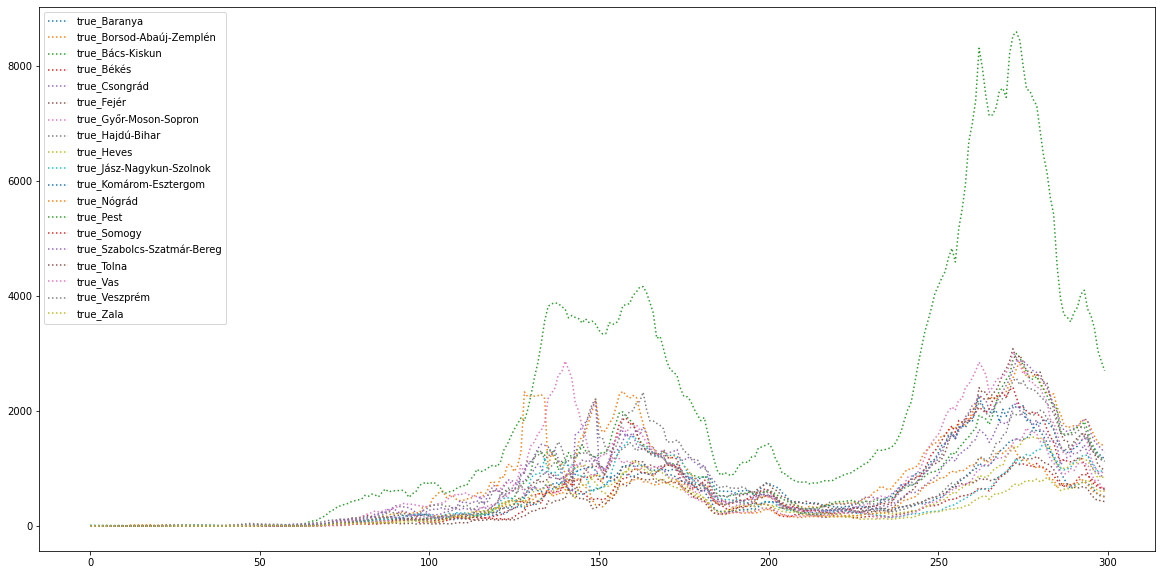

In [36]:
plt.figure(figsize=(20,10))
for county,chart in c_charts[:]:
    #plt.plot(chart, label=county)
    if(county=="főváros"):
        continue
    else:
        plt.plot(equal_ratio*county_data[county][x:300+x].to_numpy(), label="true_"+county, linestyle='dotted')
plt.legend()
plt.show()

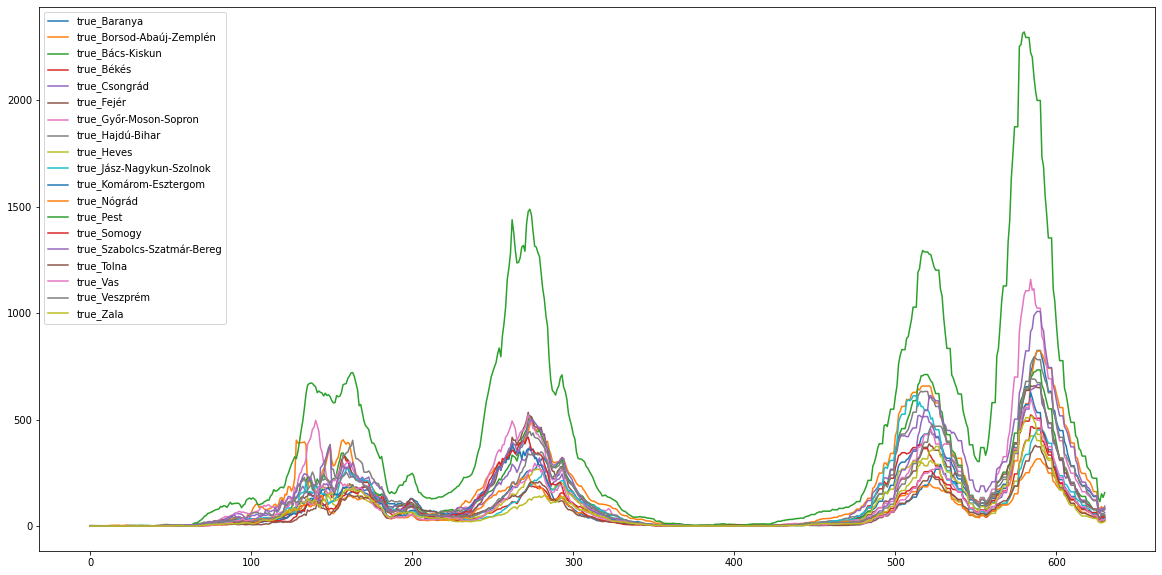

In [146]:
plt.figure(figsize=(20,10))
for county,chart in c_charts:
    #plt.plot(0.1*chart, label=county)
    if(county=="főváros"):
        continue
    else:
        plt.plot(county_data[county].to_numpy()[80:], label="true_"+county)
plt.legend()    
plt.show()


In [1]:
np.array(county_data["Nógrád"])[:250];

NameError: name 'np' is not defined

In [148]:
np.array(county_data["Borsod-Abaúj-Zemplén"])[:250].astype(int);

array([  0,   0,   0,   0,   1,   5,   5,   5,   5,   5,   6,   5,   1,
         1,   1,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   3,   3,   3,   3,   3,   3,   4,   2,   2,   3,   3,   4,
         3,   2,   3,   2,   2,   1,   1,   1,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   2,   2,   2,   2,   2,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   1,
         2,   3,   3,   4,   4,   4,   5,   5,   6,   6,   9,  12,  12,
        13,  15,  17,  16,  19,  16,  17,  20,  21,  22,  29,  27,  32,
        37,  35,  39,  42,  40,  37,  39,  40,  39,  55,  57,  6

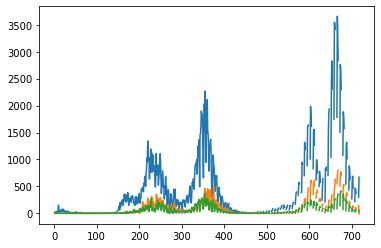

In [80]:
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv")

plt.plot(county_data["Budapest"].diff())
plt.plot(county_data["Veszprém"].diff())
plt.plot(county_data["Nógrád"].diff())

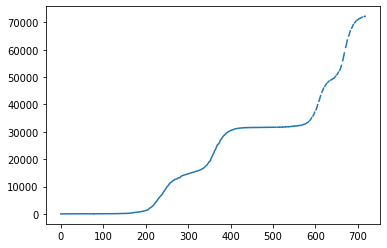

In [81]:
plt.plot(county_data["Veszprém"])

In [2]:
np.array(county_data["Nógrád"])[:250];

NameError: name 'np' is not defined

In [3]:
np.array(county_data["Komárom-Esztergom"])[:250];

NameError: name 'np' is not defined

In [152]:
len(set(pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv")["admin municip"]))

175

In [4]:
set(pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv")["admin municip"]);

NameError: name 'pd' is not defined

In [50]:
df = pd.DataFrame({'A':[1,np.nan,3], 'B':[1,4,9]})
df

,A,B
0,1.0,1
1,NaN,4
2,3.0,9


In [52]:
df.diff(axis=0)

,A,B
0,NaN,NaN
1,NaN,3.0
2,NaN,5.0


In [5]:
import os
import json
import yaml
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import Popen, STDOUT, PIPE
from multiprocessing import Pool
from logger import TBLogger

def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def read_yaml(filename="input.yaml"):
    with open(filename) as file:
        args = yaml.load(file, Loader=yaml.FullLoader)
    return args

def run(c_args, R0):
    c_args["--R0"]=R0
    c_args["--out"]=c_args["--out"]+f"R0={R0}"
    str_args = [str(item) for pair in c_args.items() for item in pair]
    p = Popen([ "../bin/main"] + str_args,
          stdout=PIPE, stdin=PIPE, stderr=STDOUT, bufsize=1, universal_newlines=True)
    p.communicate()

def get_inf_curve(df, death_rate, K):
    # Works for only 2 I compartment
    # TODO: make it tiny
    inf_cols = [c for c in df.columns if c[0:2]=='I_']
    inf_cols2 = [c for c in df.columns if c[0:2]=='I2']
    Is = df.filter(inf_cols, axis=1)
    Is2 = df.filter(inf_cols2, axis=1)
    
    I = np.zeros((len(Is), K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    I2 = np.zeros((len(Is2), K, len(Is2.columns)//K))
    for c in Is2.columns:
        _,city,age = c.split("_")
        I2[:,int(age), int(city)] = Is2.loc[:, c]
    
    I = np.sum(I, axis=2)
    I2 = np.sum(I2, axis=2)
    # Aggregate over cities
    return np.sum(I*death_rate, axis=1)+np.sum(I2*death_rate, axis=1), Is.sum(axis=1), Is2.sum(axis=1)

def aggregate_county(pop_file, df, K):
    # Get city indexes of county
    with open(pop_file) as file:
        rows = []
        for row in json.load(file)["populations"]:
            rows.append((row["index"], row["city"],row["admin_municip"], row["admin_county"]))
        city_df = pd.DataFrame(rows, columns=["index", "city", "municip", "county"])
        network_size = len(city_df)
        county_IDs = city_df.groupby('county').index.apply(list).to_dict()

    charts = []
    for county, cities in county_IDs.items():
        infs = [f"I_{city}_{age}" for city in cities for age in range(K)] + \
               [f"I2_{city}_{age}" for city in cities for age in range(K)]
        chart = df[infs].agg(sum, axis=1)
        charts.append((county, chart))
    
    df = pd.DataFrame({county:chart for county,chart in charts})
    df.to_csv(f"log/{args['sim_id']}/county.csv")
    return network_size, charts

def aggregate_age(df, K, network_size):
    charts = []
    for age in range(K):
        infs = [f"I_{city}_{age}" for city in range(network_size)] + \
               [f"I2_{city}_{age}" for city in range(network_size)]
        chart = df[infs].agg(sum, axis=1)
        charts.append(chart)
            
    df = pd.DataFrame({str(age):charts[age] for age in range(K)})
    df.to_csv(f"log/{args['sim_id']}/ages.csv")


def aggregate_all(df, K, network_size):
    # TODO multiply with death ratio
    infs = [f"I_{city}_{age}" for city in range(network_size) for age in range(K)] + \
            [f"I2_{city}_{age}" for city in range(network_size) for age in range(K)]
    chart = df[infs].agg(sum, axis=1)

args = read_yaml()

In [38]:
########################
#       LOG/SIM        #
########################
# === Read simulation data ===
#df = pd.read_csv(f"log/2/R0=2.7617185266303697")
#df = pd.read_csv(f"log/2/R0=2.231835976676545")
df = pd.read_csv(f"log/2/R0=2.422785456518524")
#df = pd.read_csv(f"log/{args['sim_id']}/sim.csv")
pop_file = f"{args['network_config_folder']}/populations_KSH.json"

# LOG: Deaths
deaths, I, I2 = get_inf_curve(df, args['death_rate'], args['age_groups'])

# LOG: County infections
network_size, c_charts = aggregate_county(pop_file, df, args['age_groups'])

# LOG: Age groups
aggregate_age(df, args['age_groups'], network_size)

########################
#       LOG/LOSS       #
########################
#city_data = pd.read_csv("../hun_codes/data/HU_settlement_tempinfo.csv")
home = "../.."
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv").fillna(method='ffill')
county_data=county_data.rename(lambda l: l if l!="Budapest" else "főváros")[county_data.columns[1:]].diff(axis=0).dropna()
county_data[county_data<0]=0
county_data = county_data.rolling(7).mean().dropna()

# Megyénkénti log
losses = []
for i in range(80):
    equal_ratio = np.sum([chart for label,chart in c_charts])/np.sum(county_data.iloc[154-i:154+args['simulated_days']-i].fillna(0).values)
    c_loss_sum = 0
    for county,chart in c_charts:
        if(county == "főváros"): county="Budapest"
        if(county not in county_data.columns):
            print(county)
        else:
            g_truth = equal_ratio*county_data[county].to_numpy()[154-i:154+args['simulated_days']-i]
            loss = np.sum(np.abs(g_truth-chart)**1)
            c_loss_sum += loss/(args['simulated_days'])
    #print(c_loss_sum/(19))
    losses.append((c_loss_sum, equal_ratio, i))

ind_min = np.argmin(losses)
loss,equal_ratio,i =losses[ind_min]
print(loss, equal_ratio, i)

9639.356165820827 3.1507424339609567 2


Text(0.5, 1.0, 'Country infection numbers: truth vs simulated')

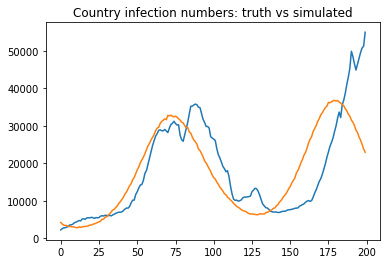

In [39]:
plt.plot(equal_ratio*county_data.sum(1).to_numpy()[154-i:154+args['simulated_days']-i], label="Ground truth")

sim_data = np.array([c[1] for c in c_charts]).sum(0)
plt.plot(sim_data, label="sim")
plt.title("Country infection numbers: truth vs simulated")

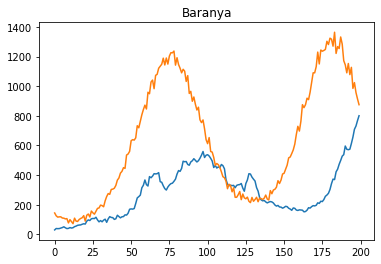

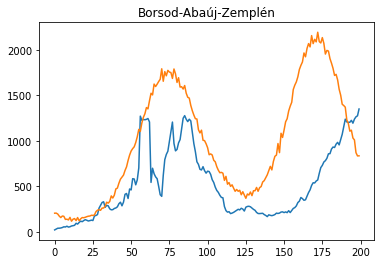

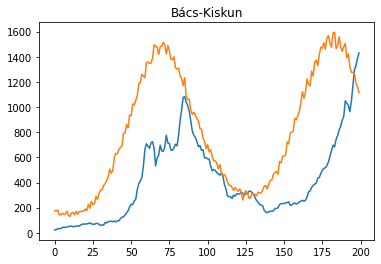

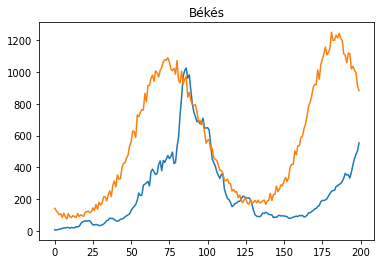

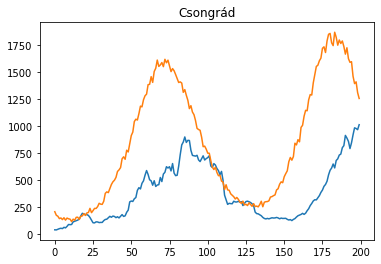

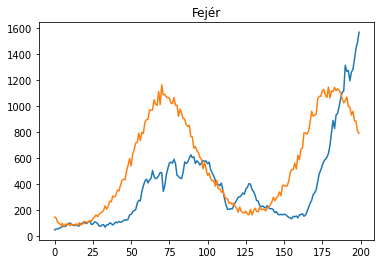

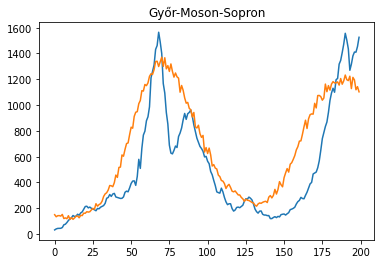

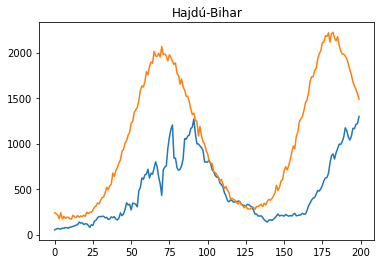

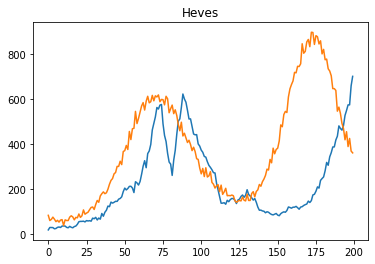

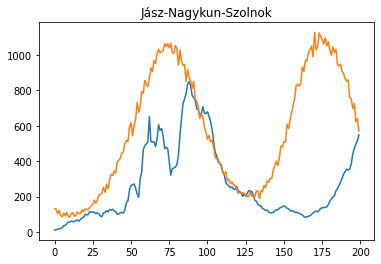

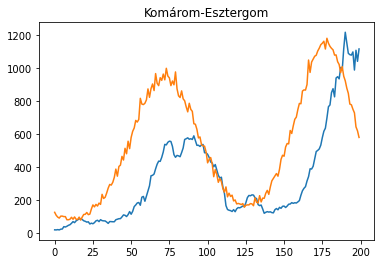

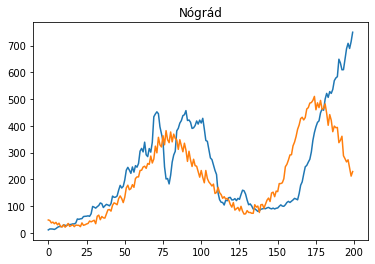

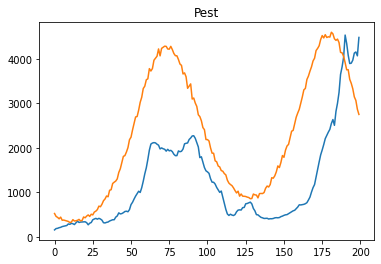

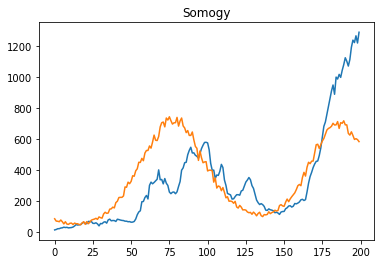

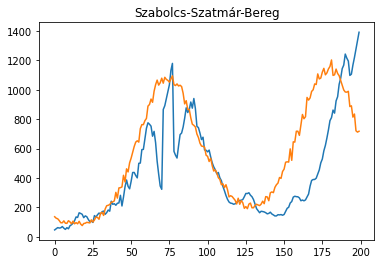

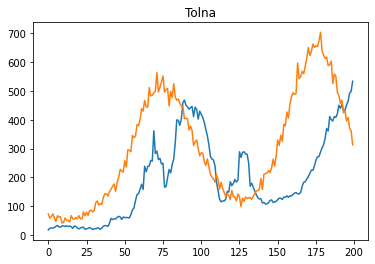

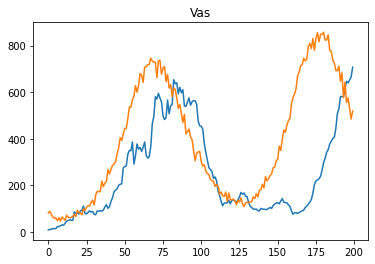

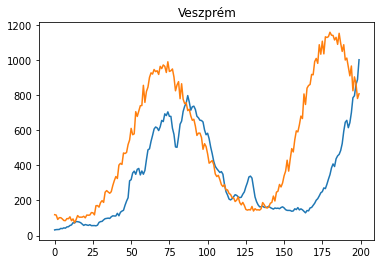

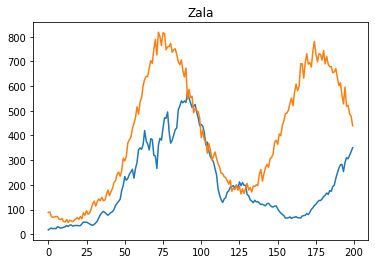

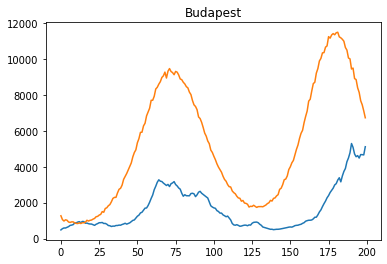

In [40]:
for county,chart in c_charts:
    if(county == "főváros"): county="Budapest"
    if(county not in county_data.columns):
        print(county)
    else:
        g_truth = equal_ratio*county_data[county].to_numpy()[154-i:154+args['simulated_days']-i]
        loss = np.sum(np.abs(g_truth-chart)**1)
        c_loss_sum += loss/(args['simulated_days'])
        
        plt.plot(g_truth)
        plt.plot(chart)
        plt.title(county)
        
        plt.show()

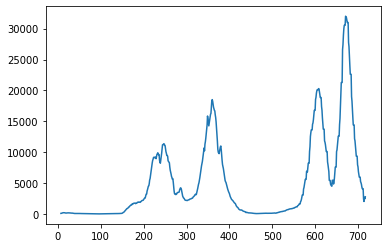